In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

# 数据分析

https://tianchi.aliyun.com/competition/entrance/531830/information

In [2]:
data_train = pd.read_csv('./train.csv')
data_test_a = pd.read_csv('./testA.csv')
data_train_sample = pd.read_csv("./train.csv",nrows=5)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

id 为贷款清单分配的唯一信用证标识  
loanAmnt 贷款金额  
term 贷款期限（year）  
interestRate 贷款利率  
installment 分期付款金额  
grade 贷款等级  
subGrade 贷款等级之子级  
employmentTitle 就业职称  
employmentLength 就业年限（年）  
homeOwnership 借款人在登记时提供的房屋所有权状况  
annualIncome 年收入  
verificationStatus 验证状态  
issueDate 贷款发放的月份  
purpose 借款人在贷款申请时的贷款用途类别  
postCode 借款人在贷款申请中提供的邮政编码的前3位数字  
regionCode 地区编码  
dti 债务收入比  
delinquency_2years 借款人过去2年信用档案中逾期30天以上的违约事件数  
ficoRangeLow 借款人在贷款发放时的fico所属的下限范围  
ficoRangeHigh 借款人在贷款发放时的fico所属的上限范围  
openAcc 借款人信用档案中未结信用额度的数量  
pubRec 贬损公共记录的数量  
pubRecBankruptcies 公开记录清除的数量  
revolBal 信贷周转余额合计  
revolUtil 循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额  
totalAcc 借款人信用档案中当前的信用额度总数  
initialListStatus 贷款的初始列表状态  
applicationType 表明贷款是个人申请还是与两个共同借款人的联合申请  
earliesCreditLine 借款人最早报告的信用额度开立的月份  
title 借款人提供的贷款名称  
policyCode 公开可用的策略_代码=1新产品不公开可用的策略_代码=2  
n系列匿名特征  
匿名特征n0-n14，为一些贷款人行为计数特征的处理

In [4]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


不存在缺失率大于50%的特征

In [5]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
        
fea_null_moreThanHalf

{}

<AxesSubplot:>

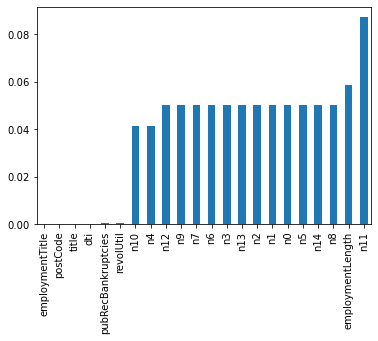

In [6]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]
one_value_fea,one_value_fea_test

(['policyCode'], ['policyCode'])

In [54]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        52489
10+ years    262753
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
NaN           46799
Name: employmentLength, dtype: int64

In [8]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

数值型变量

In [9]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

类别型变量

In [10]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [12]:
#过滤数值型类别特征
def filter4serial_fea(data,feas):
    serialfea = []
    noserial = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            noserial.append(fea)
            continue
        serialfea.append(fea)
    return serialfea,noserial
numerical_serial_fea,numerical_noserial_fea = filter4serial_fea(data_train,numerical_fea)

In [13]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [14]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

数值离散型变量

In [15]:
def print_feas(data,feas):
    for fea in feas:
        print(data[fea].value_counts())
        print('*'*10)
print_feas(data_train,numerical_noserial_fea)

3    606902
5    193098
Name: term, dtype: int64
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64
1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64
0    640390
1    159610
Name: isDefault, dtype: int64
0    466438
1    333562
Name: initialListStatus, dtype: int64
0    784586
1     15414
Name: applicationType, dtype: int64
1.0    800000
Name: policyCode, dtype: int64
0.0    729682
1.0       540
2.0        24
3.0         1
4.0         1
Name: n11, dtype: int64
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64


数值连续型变量

In [16]:
import warnings
warnings.filterwarnings('ignore')

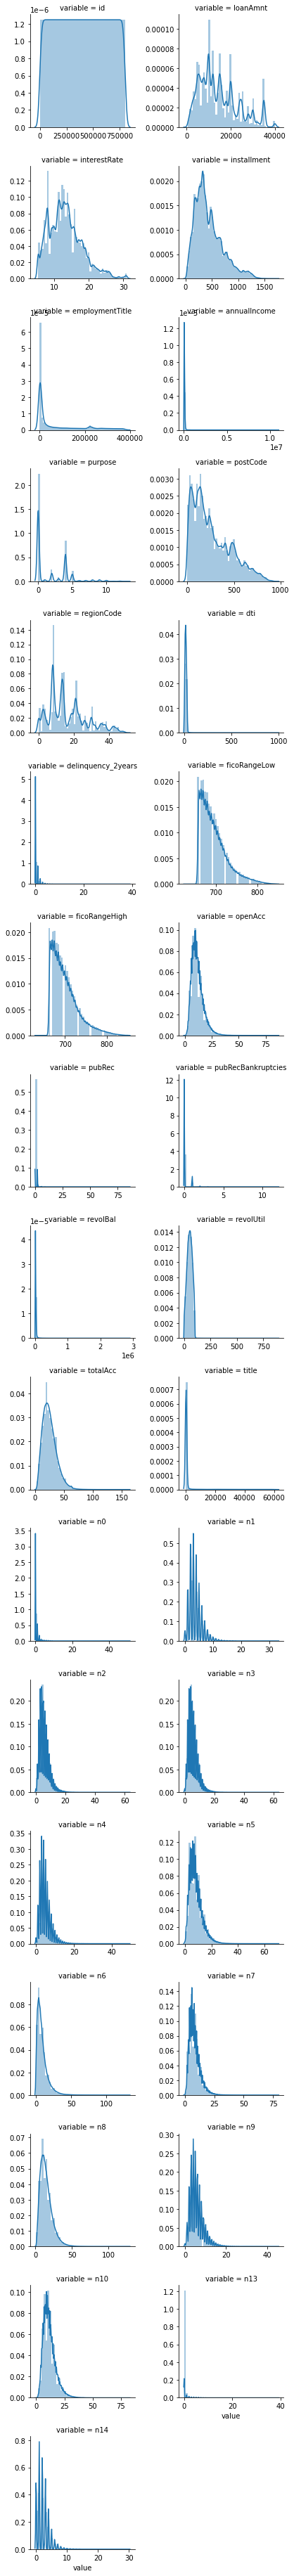

In [17]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

非数值类别型变量

In [18]:
print_feas(data_train,category_fea)

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007

In [20]:
#pfr = pandas_profiling.ProfileReport(data_train)
#pfr.to_file("./example.html")

# 特征工程

In [28]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
# from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

In [36]:
#numerical_fea.remove('isDefault')

In [38]:
#查看缺失值情况
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

缺失值处理

In [39]:
#按照平均数填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())
#按照众数填充类别型特征
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [41]:
#查看类别特征
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

时序处理

In [51]:
#贷款发放的月份
#转化成时间格式
for data in [data_train, data_test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'])
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    #构造时间特征
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [55]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [data_train, data_test_a]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [56]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

0.0      64237
1.0      52489
2.0      72358
3.0      64152
4.0      47985
5.0      50102
6.0      37254
7.0      35407
8.0      36192
9.0      30272
10.0    262753
NaN      46799
Name: employmentLength, dtype: int64

In [57]:
data_train['earliesCreditLine']

0         Aug-2001
1         May-2002
2         May-2006
3         May-1999
4         Aug-1977
            ...   
799995    Aug-2011
799996    May-1989
799997    Jul-2002
799998    Jan-1994
799999    Feb-2002
Name: earliesCreditLine, Length: 800000, dtype: object

In [58]:
for data in [data_train, data_test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [60]:
data_train['earliesCreditLine']

0         2001
1         2002
2         2006
3         1999
4         1977
          ... 
799995    2011
799996    1989
799997    2002
799998    1994
799999    2002
Name: earliesCreditLine, Length: 800000, dtype: int64

类别特征处理

In [62]:
# 部分类别特征
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', \
                 'applicationType', 'initialListStatus', 'title', 'policyCode']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 889
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058
policyCode 类型数： 1


In [ ]:
for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [11]:
data_train[category_fea]

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,NaN,2016-03-01,Aug-1977
...,...,...,...,...,...
799995,C,C4,7 years,2016-07-01,Aug-2011
799996,A,A4,10+ years,2013-04-01,May-1989
799997,C,C3,10+ years,2015-10-01,Jul-2002
799998,A,A4,10+ years,2015-02-01,Jan-1994


In [63]:
# 类型数在2之上，又不是高维稀疏的,且纯分类特征
for data in [data_train, data_test_a]:
    data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode'], drop_first=True)

异常值检测

In [66]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [67]:
data_train = data_train.copy()
for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [68]:
#删除异常值
for fea in numerical_fea:
    data_train = data_train[data_train[fea+'_outliers']=='正常值']
    data_train = data_train.reset_index(drop=True) 

特征编码

In [69]:
#label-encode:subGrade,postCode,title
# 高维类别特征需要进行转换
for col in tqdm(['employmentTitle', 'postCode', 'title','subGrade']):
    le = LabelEncoder()
    le.fit(list(data_train[col].astype(str).values) + list(data_test_a[col].astype(str).values))
    data_train[col] = le.transform(list(data_train[col].astype(str).values))
    data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))
print('Label Encoding 完成')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.25s/it]

Label Encoding 完成


In [72]:
data_train

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5_outliers,n6_outliers,n7_outliers,n8_outliers,n9_outliers,n10_outliers,n11_outliers,n12_outliers,n13_outliers,n14_outliers
0,0,35000.0,5,19.52,917.97,E,21,161280,2.0,2,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
1,1,18000.0,5,18.49,461.90,D,16,89538,5.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
2,2,12000.0,5,16.99,298.17,D,17,159367,8.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
3,6,2050.0,3,7.69,63.95,A,3,59830,9.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
4,7,11500.0,3,14.98,398.54,C,12,85242,1.0,1,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612737,799994,15000.0,5,19.52,393.42,E,21,142989,7.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
612738,799995,25000.0,3,14.49,860.41,C,13,125173,7.0,1,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
612739,799997,6000.0,3,13.33,203.12,C,12,119990,10.0,1,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
612740,799998,19200.0,3,6.92,592.14,A,3,38409,10.0,0,...,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
